<a href="https://colab.research.google.com/github/theankits/-NeuroYOLO-Brain-Tumor-Classification-and-Segmentation-/blob/main/NeuroYOLO_Brain_Tumor_Classification_and_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1pUG3KKu7-fLBulAWD5iufk2oN-VHTsdt"
output_file = "Brain_Tumor_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1pUG3KKu7-fLBulAWD5iufk2oN-VHTsdt
From (redirected): https://drive.google.com/uc?id=1pUG3KKu7-fLBulAWD5iufk2oN-VHTsdt&confirm=t&uuid=34c60dc8-b657-4428-acba-0bdd8f7129c6
To: /content/Brain_Tumor_Datasets.zip
100%|██████████| 32.9M/32.9M [00:01<00:00, 31.8MB/s]


'Brain_Tumor_Datasets.zip'

In [3]:
import zipfile
z= zipfile.ZipFile('/content/Brain_Tumor_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Brain_Tumor_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")

Moved 'Brain_Tumor_Datasets' to 'datasets/Brain_Tumor_Datasets' successfully.


In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Brain_Tumor_Datasets',
    'train': 'train',
    'test': 'test',
    'val': 'train',
    'nc': 2,
    'names': ['Normal','Brain Tumor']
}

# Save to pothole.yaml
with open('Brain_Tumor_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Brain_Tumor_Datasets.yaml created successfully!")

Brain_Tumor_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO

# Load a YOLOv11 classification model
model = YOLO('yolo11l-cls.pt')  # Replace with 'yolo11m-cls.pt' or similar for better accuracy

# Train the classification model
model.train(
    data='Brain_Tumor_Datasets',
    epochs=10,
    imgsz=224,
    batch=8,
    name='Brain_Tumor_Datasets_yolo11',
    save=True,
    save_period=-1,
    patience=20,
    val=True,
    degrees=15,       # Rotation
    flipud=0.3,       # Vertical flip probability
    fliplr=0.5,       # Horizontal flip probability
    scale=0.5,        # Image scaling
    shear=10,         # Shear angle
    translate=0.1     # Translation
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Brain_Tumor_Datasets, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a32ce6695e0>
curves: []
curves_results: []
fitness: 0.9637305736541748
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9274611473083496, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9637305736541748}
save_dir: PosixPath('/content/runs/classify/Brain_Tumor_Datasets_yolo11')
speed: {'preprocess': 0.11638584455701105, 'inference': 1.97840816580434, 'loss': 0.0008884404130793331, 'postprocess': 0.001066341971066374}
task: 'classify'
top1: 0.9274611473083496
top5: 1.0


image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1920.jpg: 224x224 YES 0.99, NO 0.01, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/NO/no_10.jpg: 224x224 NO 0.63, YES 0.37, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1898.jpg: 224x224 YES 0.99, NO 0.01, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1947.jpg: 224x224 YES 0.99, NO 0.01, 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1967.jpg: 224x224 YES 0.94, NO 0.06, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 22

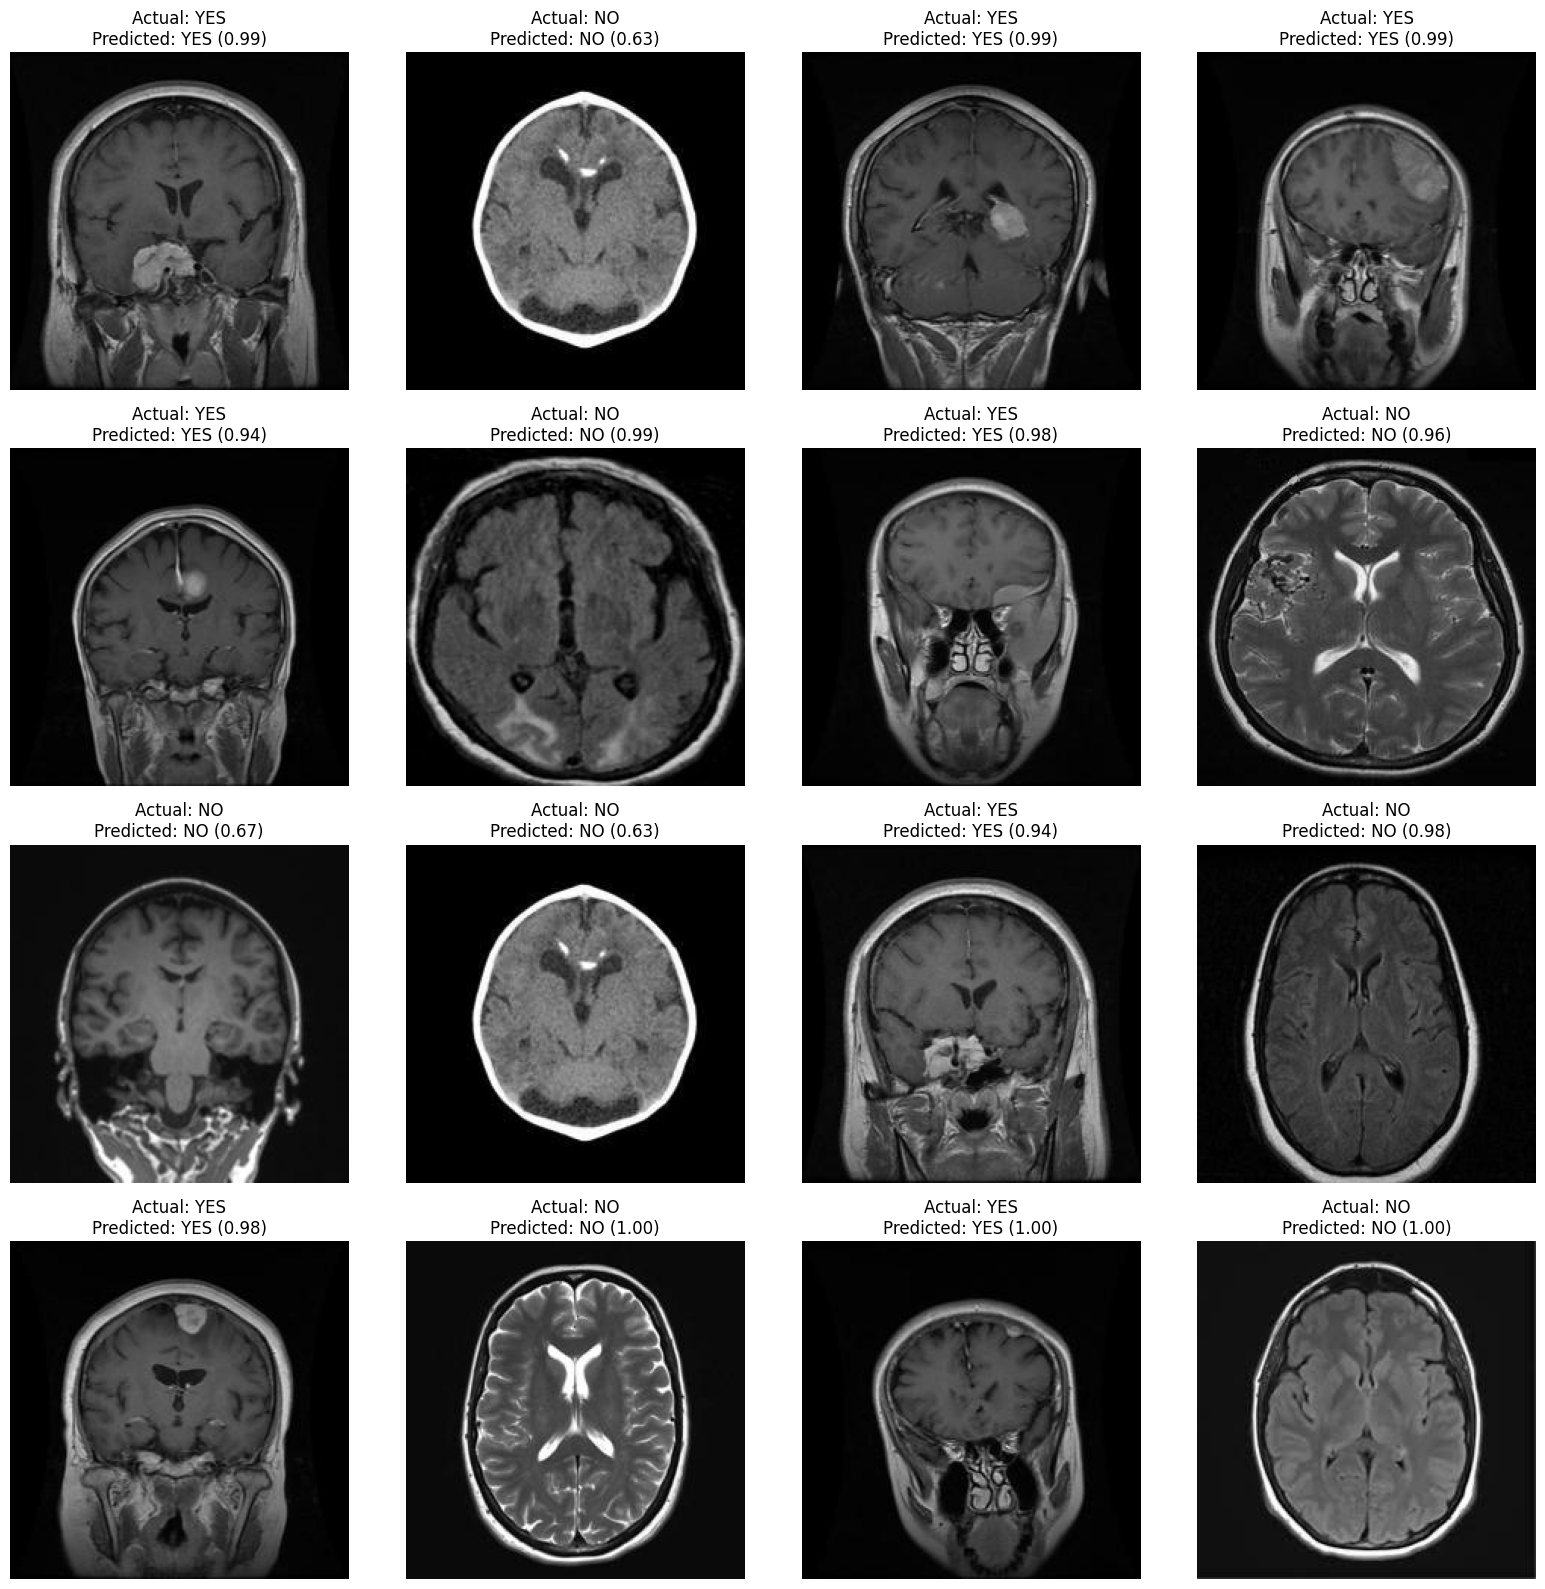

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained classification model
model = YOLO('runs/classify/Brain_Tumor_Datasets_yolo11/weights/best.pt')

# Test images directory
test_images_folders = 'datasets/Brain_Tumor_Datasets/test'

# Get list of image files
image_folders = os.listdir(test_images_folders)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_folder = random.choice(image_folders)
    img_files = os.listdir(os.path.join(test_images_folders,img_folder))
    img_path = os.path.join(test_images_folders, img_folder, random.choice(img_files))
    image = cv2.imread(img_path)

    # Perform classification inference
    results = model(img_path)  # returns a list with one result
    result = results[0]

    # Get predicted class name
    class_id = int(result.probs.top1)
    class_name = model.names[class_id]
    confidence = result.probs.top1conf.item()

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with class name and confidence
    ax[idx].imshow(image_rgb)
    ax[idx].set_title(f"Actual: {img_folder}\nPredicted: {class_name} ({confidence:.2f})", fontsize=12)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()


In [11]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1xTMWJ3tIzrjMyLZhjgGBGtzWAo5b1X8Y"
output_file = "Brain_Tumor_Segmentation_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1xTMWJ3tIzrjMyLZhjgGBGtzWAo5b1X8Y
From (redirected): https://drive.google.com/uc?id=1xTMWJ3tIzrjMyLZhjgGBGtzWAo5b1X8Y&confirm=t&uuid=1481889a-2121-4e87-9e43-5321f245c1c0
To: /content/Brain_Tumor_Segmentation_Datasets.zip
100%|██████████| 47.4M/47.4M [00:01<00:00, 29.7MB/s]


'Brain_Tumor_Segmentation_Datasets.zip'

In [12]:
import zipfile
z = zipfile.ZipFile('/content/Brain_Tumor_Segmentation_Datasets.zip')
z.extractall()

In [13]:
import os
import shutil

src = 'Brain_Tumor_Segmentation_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")

Moved 'Brain_Tumor_Segmentation_Datasets' to 'datasets/Brain_Tumor_Segmentation_Datasets' successfully.


In [14]:
import yaml

# Define YAML configuration
data = {
    'path': 'Brain_Tumor_Segmentation_Datasets',
    'train': 'train/images',
    'val': 'valid/images',
    'nc': 1,
    'names': ['Tumor']
}

# Save to pothole.yaml
with open('Brain_Tumor_Segmentation_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Brain_Tumor_Segmentation_Datasets.yaml created successfully!")

Brain_Tumor_Segmentation_Datasets.yaml created successfully!


The error `RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory` suggests an issue with loading the model file, possibly due to a version mismatch between the model file format and the installed PyTorch library, or a corrupted file.

To help diagnose this, I will check the installed versions of `torch` and `ultralytics`.

In [22]:
import torch
import ultralytics

print(f"PyTorch version: {torch.__version__}")
print(f"Ultralytics version: {ultralytics.__version__}")

PyTorch version: 2.8.0+cu126
Ultralytics version: 8.3.217


In [19]:
# Download the official yolov9e-seg.pt model
!wget https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov9e-seg.pt -O yolov9e-seg.pt

--2025-10-19 08:12:05--  https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov9e-seg.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/e80a5a1f-bc36-4f8f-a9c8-70a4e631f072?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-19T08%3A46%3A21Z&rscd=attachment%3B+filename%3Dyolov9e-seg.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-19T07%3A46%3A05Z&ske=2025-10-19T08%3A46%3A21Z&sks=b&skv=2018-11-09&sig=j%2B4%2BVag%2BRxG0EZtngwQK4xswxd2JMPU%2BWwOc6cMGNmY%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MDg2NTEyNSwibmJmIjoxNzYwODYxNTI1LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjd

In [25]:
from ultralytics import YOLO
import gdown
import os

# Load a pretrained YOLOv8 segmentation model
model_path = 'yolov8m-seg.pt'

if not os.path.exists(model_path):
    print(f"Model file not found at {model_path}. Please ensure it is downloaded.")
else:
    print(f"Loading model from {model_path}")
    model = YOLO(model_path)

    # Train the model with data augmentation
    model.train(
        data='Brain_Tumor_Segmentation_Datasets.yaml',
        epochs=50,
        imgsz=640,
        batch=8,
        name='Brain_Tumor_Segmentation_Datasets_yolov8',
        save=True,
        save_period=-1,
        patience=20,
        val=True,
        augment=True,  # Enables default augmentations
        degrees=10.0,  # Rotation
        translate=0.1,  # Translation
        scale=0.5,  # Scaling
        shear=2.0,  # Shearing
        perspective=0.0005,  # Perspective
        flipud=0.3,  # Vertical flip probability
        fliplr=0.5,  # Horizontal flip probability
        hsv_h=0.015,  # Hue augmentation
        hsv_s=0.7,    # Saturation
        hsv_v=0.4     # Value
    )

Loading model from yolov8m-seg.pt
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Brain_Tumor_Segmentation_Datasets.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Brain_Tumor_Segmentation_Datasets_yolov8, nbs=64, nms=False, opset=None, optimize=False, op

In [26]:
import numpy as np

def draw_segmentation(image, mask, class_colors):

    # Define transparency level (0 to 1)
    alpha = 0.2  # 50% transparency

    # Create a colored overlay of the same shape as the image
    overlay = np.zeros_like(image, dtype=np.uint8)

    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue  # Skip background class
        class_mask = (mask == class_id)
        color = class_colors[class_id]
        for c in range(3):
            overlay[..., c][class_mask] = color[c]

    # ✅ Fixed: Convert PIL image to NumPy before resizing
    image = np.array(image)  # Convert PIL to NumPy

    # Create a copy to preserve original image
    blended_image = image.copy()

    # Blend for all class masks
    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue
        class_mask = (mask == class_id)
        for c in range(3):  # For each color channel
            blended_image[..., c][class_mask] = (
                image[..., c][class_mask] * (1 - alpha) +
                overlay[..., c][class_mask] * alpha
            ).astype(np.uint8)

    return blended_image


image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y183_jpg.rf.92b0f56efd12d25118c40915a33ee732.jpg: 640x640 1 Tumor, 45.7ms
Speed: 2.3ms preprocess, 45.7ms inference, 17.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y109_JPG.rf.3047c809fb6e9de6380be8c019ccefa5.jpg: 640x640 1 Tumor, 43.3ms
Speed: 2.1ms preprocess, 43.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y92_png.rf.5bb4c6b29c88b31d3cfc60836c6c96bb.jpg: 640x640 1 Tumor, 35.8ms
Speed: 1.6ms preprocess, 35.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/y558_jpg.rf.1fd42f209e0bf57d6b4fcb94789ed0fa.jpg: 640x640 (no detections), 35.5ms
Speed: 1.5ms preprocess, 35.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1

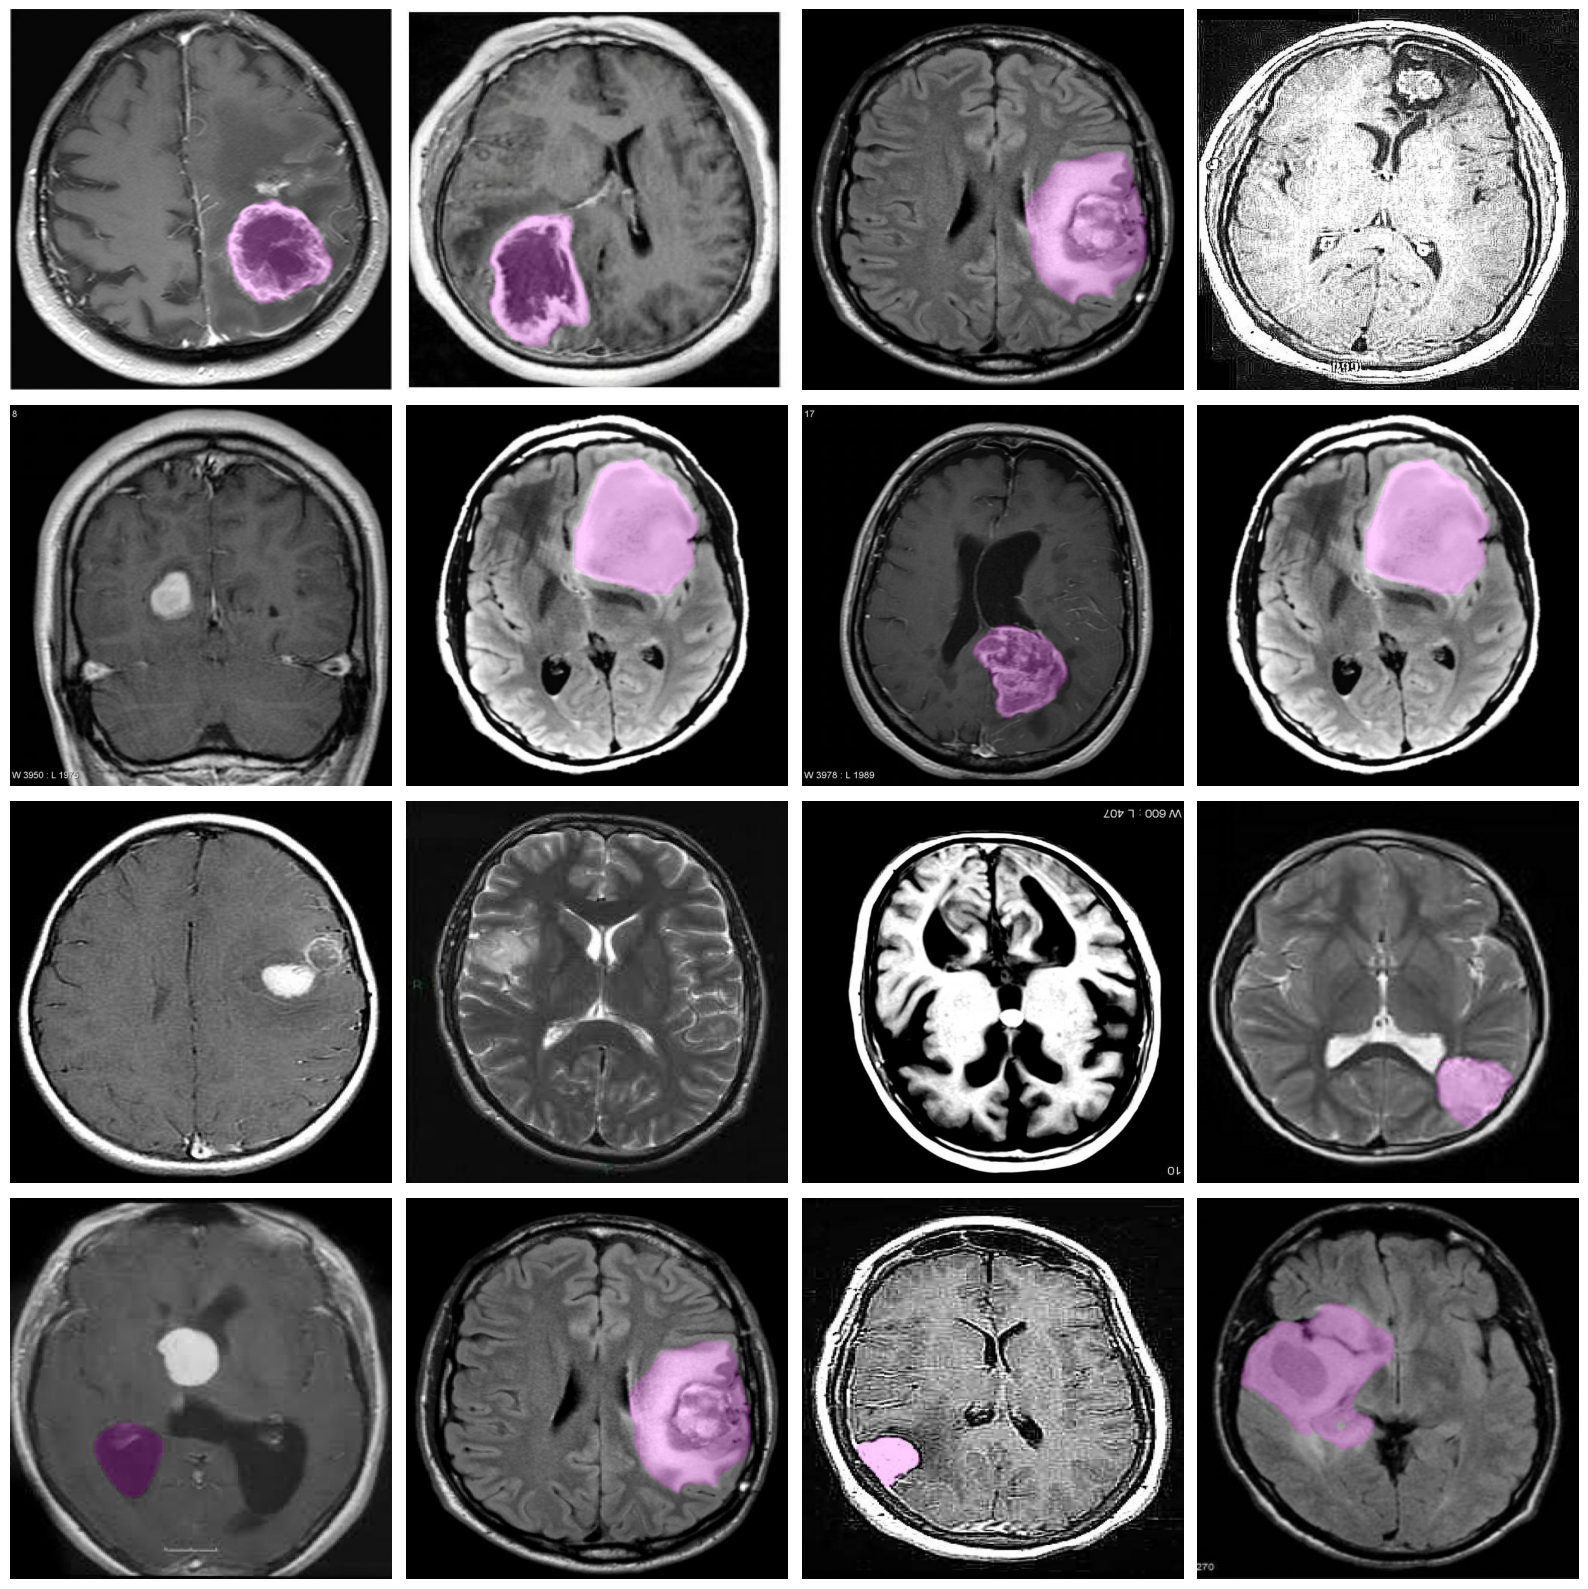

In [27]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/segment/Brain_Tumor_Segmentation_Datasets_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Brain_Tumor_Segmentation_Datasets/test/images'

# Define colors for visualization
color_sample = {
    0 : (0, 0, 0),
    1 : (255, 0, 255),      # Green
}

image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_path)[0]
    # print(results)

    if results.masks:
      # Draw segmentation masks
      for seg in results.masks.data:
          mask = seg.cpu().numpy()
          # Resize mask to match image dimensions
          mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
          image = draw_segmentation(image_rgb, mask_resized, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()